# Taking Measure of the Data - Time Series Data

Aus: Walker, Michael (2024): Python data cleaning cookbook. Prepare your data for analysis with pandas, NumPy, Matplotlib, scikit-learn and OpenAI. Second edition. Taking Measure of Your Data. Birmingham, UK: Packt Publishing Ltd (Expert insight). Online verfügbar unter https://learning.oreilly.com/library/view/-/9781803239873/?ar.


In [12]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

In [2]:
# Import Data 
data = pd.read_csv('C:/Users/ChiaraVogt/Desktop/Masterarbeit/Ligue180-HotlineDemand-ViolenceAgainstWomenInBrazil/df_hourly.csv')
data.head(5)

,date,calls
0,2018-10-31 18:00:00,4
1,2018-10-31 19:00:00,1
2,2018-10-31 20:00:00,0
3,2018-10-31 21:00:00,0
4,2018-10-31 22:00:00,0


In [3]:
# Size of Dataset
data.shape

(40926, 2)

In [4]:
# Columns and Null-Value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40926 entries, 0 to 40925
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    40926 non-null  object
 1   calls   40926 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 639.6+ KB


In [5]:
data[data.select_dtypes(['object']).columns] = \
  data.select_dtypes(['object']). \
  transform(lambda x: x.astype('category'))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40926 entries, 0 to 40925
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   date    40926 non-null  category
 1   calls   40926 non-null  int64   
dtypes: category(1), int64(1)
memory usage: 1.8 MB


In [7]:
data['date'] = pd.to_datetime(data['date'])
data

,date,calls
0,2018-10-31 18:00:00,4
1,2018-10-31 19:00:00,1
2,2018-10-31 20:00:00,0
3,2018-10-31 21:00:00,0
4,2018-10-31 22:00:00,0
...,...,...
40921,2023-12-31 19:00:00,13
40922,2023-12-31 20:00:00,12
40923,2023-12-31 21:00:00,8
40924,2023-12-31 22:00:00,5


In [8]:
data.set_index('date', inplace=True)
data

,calls
date,
2018-10-31 18:00:00,4
2018-10-31 19:00:00,1
2018-10-31 20:00:00,0
2018-10-31 21:00:00,0
2018-10-31 22:00:00,0
...,...
2023-12-31 19:00:00,13
2023-12-31 20:00:00,12
2023-12-31 21:00:00,8


## Outlier Detection Using Statistical Methods

## Transformation of the Data
Adding Hour, Weekday, Week of the Year, Month and Year as extra Columns

In [9]:
data['hour'] = data.index.hour                  # Stunde
data['weekday'] = data.index.weekday            # Wochentag (0=Montag, 6=Sonntag)
data['weekofyear'] = data.index.isocalendar().week  # Woche des Jahres
data['day'] = data.index.day                    # Tag des Monats
data['month'] = data.index.month                # Monat
data['year'] = data.index.year                  # Jahr


In [10]:
data.head(24)

,calls,hour,weekday,weekofyear,day,month,year
date,,,,,,,
2018-10-31 18:00:00,4,18,2,44,31,10,2018
2018-10-31 19:00:00,1,19,2,44,31,10,2018
2018-10-31 20:00:00,0,20,2,44,31,10,2018
2018-10-31 21:00:00,0,21,2,44,31,10,2018
2018-10-31 22:00:00,0,22,2,44,31,10,2018
2018-10-31 23:00:00,0,23,2,44,31,10,2018
2018-11-01 00:00:00,8,0,3,44,1,11,2018
2018-11-01 01:00:00,3,1,3,44,1,11,2018
2018-11-01 02:00:00,0,2,3,44,1,11,2018


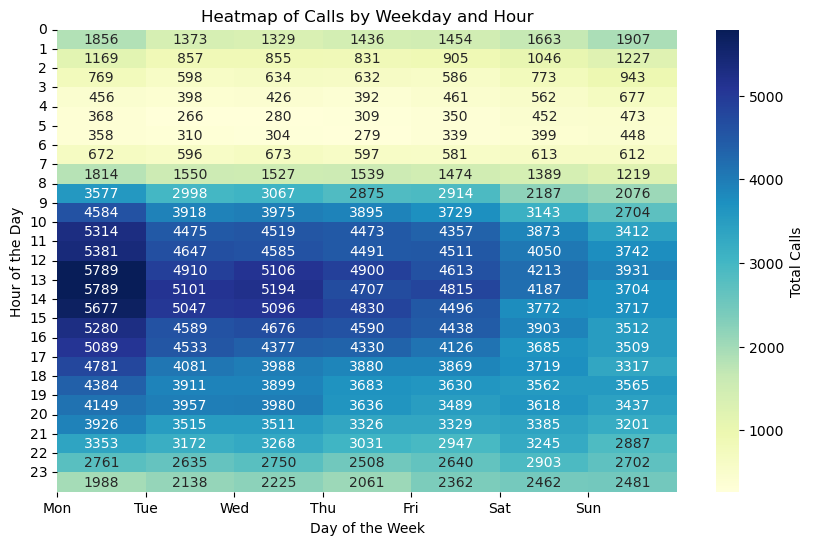

In [16]:
calls_per_hour_weekday = data.groupby(['hour', 'weekday'])['calls'].sum().unstack()
plt.figure(figsize=(10, 6))  # Optional: Größe der Heatmap
sns.heatmap(calls_per_hour_weekday, cmap="YlGnBu", annot=True, fmt="g", cbar_kws={'label': 'Total Calls'})

# Achsenbeschriftungen und Titel
plt.title('Heatmap of Calls by Weekday and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

# Anpassung der x-Achse mit Wochentagnamen
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

# Anpassung der y-Achse mit den Stunden (0-23)
plt.yticks(ticks=range(24), labels=range(24), rotation=0)

plt.show()

In [27]:

def categorical_heatmap (x, y, z):
    calls_per_hour_weekday = data.groupby([y, x])[z].sum().unstack()
    plt.figure(figsize=(10, 6))  # Optional: Größe der Heatmap
    sns.heatmap(calls_per_hour_weekday, cmap="YlGnBu", annot=True, fmt="g", cbar_kws={'label': 'Total ' + z})

    # Achsenbeschriftungen und Titel
    plt.title('Heatmap of ' + z + ' by ' + x + ' and ' + y + ' of the Year')
    plt.xlabel(x)
    plt.ylabel(y)

    # Anpassung der x-Achse mit Wochentagnamen
    #plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

    # Anpassung der y-Achse mit den Stunden (0-23)
    plt.yticks(rotation=0)

    plt.show()

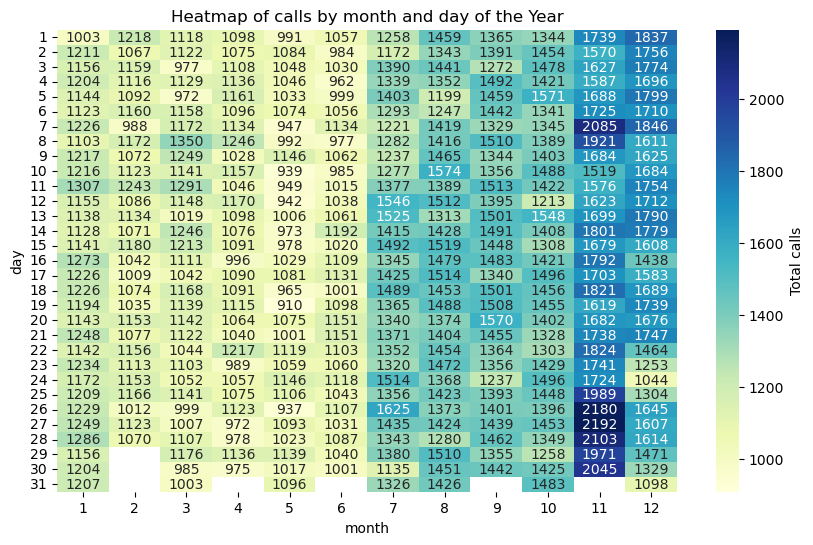

In [29]:
categorical_heatmap('month', 'day', 'calls') #TODO durch die Menge an Jahren teilen -> ins Verhältnis setzen